<h1> Homework 03 </h1>

<h3> Due Tue, Feb 26, 11:59pm </h3> 

Download the .ipynb file for this notebook, and place your solutions where indicated (you can make more cells for each problem), keeping the original problem descriptions.  Upload only one file, which contains all your work; it should be named "HW03_firstname_lastname".  Please include comments in your code; this can also help you get partial credit if your code doesn't work.

Then upload it to Blackboard as Homework 3 in the Assignments tab. See Collaboration Policy in Homework section of course webpage (it's the same as it was for previous homeworks).  

<h3> Problem 1 </h3>

Write a function <samp>extended_gcd</samp> that takes in a pair of positive integers $a,b$ and returns a pair $(e,f)$ of integers such that $ae+bf=d$, where $d$ equals $gcd(a,b)$.  Do not use the builtin function <samp>xgcd</samp> (though you can use this to test your function).  Use your function to find an inverse of $17$ modulo $122$, i.e. an integer $e$ such that 
$$17e \equiv 1 \bmod 122.$$  

In [32]:
def extended_gcd(a,b):
    preve, e = 1, 0; prevf, f = 0, 1
    while b:
        q, d = divmod(a,b)
        e, preve = preve - q*e, e
        f, prevf = prevf - q*f, f
        a, b = b, d
    return a, preve, prevf
print extended_gcd(17, 122)
print xgcd(17,122) ##test
    

(1, -43, 6)
(1, -43, 6)


# <h3> Problem 2 </h3>

Write a function <samp>num_primes(n)</samp> that returnes the number of primes that are less than or equal to $n$. For instance <samp>num_primes(5)</samp> should return $3$, since $2,3,5$ are the primes that are less than or equal to $5$.  Do not use any bulit-in functions that have to do with primes (you are welcome to reuse the primality test function you wrote for a previous homework). Use it compute the ratio <samp>num_primes(n)/n</samp> for $n=10, 10^2, \ldots, 10^{10}$.  Plot these ratios using the built-in <samp>list_plot</samp> command (you will need to look up the syntax, since we haven't covered this).  How do you think this ratio behaves as $n\to \infty$? 

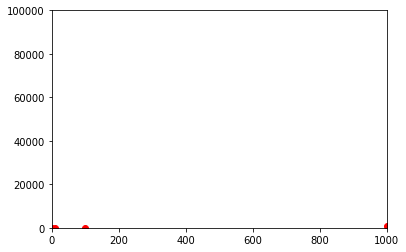

2
3
5
10
100
1000
10000
100000
1000000
10000000
100000000
1000000000
10000000000
None


In [142]:
import matplotlib.pyplot as plt

def num_primes(n):
    if n <= 1:
        return False
    for i in range(2, n):
        if n % i == 0:
            return False
    return True

def print_num_primes(n):
    for i in range(2, n + 1):
        if num_primes(i):
            print(i)
            
#def ratio_num_primes(n):
    for i in (10 ** p for p in range (1,11)):
        print i
        
plt.plot([1,10,100,1000,100000,1000000,10000000,100000000,1000000000,10000000000],[1,10,100,1000,100000,1000000,10000000,100000000,1000000000,10000000000], 'ro')
plt.axis([0, 1000, 0, 100000])
plt.show()

#print num_primes(5)
print print_num_primes(5)


<h3> Problem 3 </h3> 

We say that two integers $a,b$ are <i> relatively prime </i>  if $gcd(a,b)=1$ (or equivalently, they share no common prime factor).  Write a function <samp>num_rel_prime(n)</samp> that returns the number of positive integers less than $n$ that are relatively prime to $n$ (where $n$ is any positive integer).  For instance, <samp>num_rel_prime(6)</samp> should return $2$, since $1,5$ are the positive integers less than $6$ that are relatively prime to it.  Compute <samp>num_rel_prime(n)</samp> for 
$$n=7,11,13,17,19,23,4,9,25,49,12,18,20,50.$$
Based on these experiments and any more that you find useful, guess a general formula for <samp>num_rel_prime(n)</samp> in terms of the prime factorization of $n$.  

In [101]:
def gcd(a, b):
    if a < b:
        a, b = b, a
    while b != 0:
        temp = a
        a = b
        b = temp % b
    return a

def num_rel_prime(n):
    count = 0
    for i in range(1, n):
        if gcd(i, n) == 1:
            count += 1
    return count

print(6, num_rel_prime(6))  #each n is paired with its prime i.e 6 is paired with 2
print(7, num_rel_prime(7))
print(11, num_rel_prime(11))
print(13, num_rel_prime(13))
print(17, num_rel_prime(17))
print(19, num_rel_prime(19))
print(23, num_rel_prime(23))
print(4, num_rel_prime(4))
print(9, num_rel_prime(9))
print(25, num_rel_prime(25))
print(49, num_rel_prime(49))
print(12, num_rel_prime(18))
print(18, num_rel_prime(18))
print(20, num_rel_prime(20))
print(50, num_rel_prime(50))

# a general formula that can be used for prime factorization would be Wilsons
# Theorem. That being f(n) = [(n! % (n + 1))/n](n-1) + 2  for positive integer n

(6, 2)
(7, 6)
(11, 10)
(13, 12)
(17, 16)
(19, 18)
(23, 22)
(4, 2)
(9, 6)
(25, 20)
(49, 42)
(12, 6)
(18, 6)
(20, 8)
(50, 20)



<h3> Problem 4 </h3>

(a) Write a function <samp>alt_gcd(a,b)</samp> that returns the gcd of $a,b$ (where $a,b$ are positive integers), but do NOT use the Euclidean algorithm.  Rather, use the factoring function you wrote for last homework (or some modification of it); recall that if we know the prime factorizations of both $a,b$, we can find the $gcd$ by looking at the smaller power of each prime that occurs in each of $a,b$.  

(b) Let $f(n)$ be the maximum of the running time of your <samp>alt_gcd(a,b)</samp> function, where $a,b$ range over all pairs of $n$ digit numbers.  Using timed experiments, guess the rough order of growth of $f(n)$ as $n\to \infty$ (i.e. is it logarithmitic, linear, quadratic, exponential)?  The <samp>%%time</samp> and <samp>%time</samp> commands may be useful for doing the timing.  

In [136]:
def prime(n): 
    i = 2  
    factors = []  
    while i * i <= n:          
        if n % i:
            i += 1
        else:
            n //= i
            factors.append(i)
    if n > 1:
            factors.append(n)
    return factors

def alt_gcd(a, b):
    
    prime_a = prime(a)
    prime_b = prime(b)
    
    commonFactors = []
    
    for i in prime_a:
        if i in prime_b:
            commonFactors.append(i)
            prime_b.remove(i)
    
    gcd = 1
    
    for i in commonFactors:
        gcd *= x
    return gcd

print prime(100)
print alt_gcd(800,250)
print alt_gcd(1000,250)
print alt_gcd(2000, 600)
print alt_gcd(20000, 6000)
print alt_gcd(200000, 60000)
print alt_gcd(200000000000000000, 6000000000000)
%time

##Through the experiments, the order of growth as n approaches 
##infinity is logarithmitic


[2, 2, 5, 5]
x^3
x^4
x^5
x^7
x^9
x^25
CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs
